In [3]:
#확률적 경사 하강법
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
#scpeices는 target으로 나머지는 input으로
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [6]:
#훈련과 테스트 셋 분류
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [7]:
#특성 표준화 처리
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
# 확률적 하강법을 사용하는 것은 SGDClassifier
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)

sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.773109243697479
0.775


C:\Users\gunny\AppData\Local\conda\conda\envs\keras_gpu\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [10]:
#훈련을 이어서 할때는 partial_fit()
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.825


In [11]:
#overfit과 uderfit을 알아보기 위한 방안
import numpy as np

sc = SGDClassifier(loss='log', random_state = 42)
train_score =[]
test_score=[]
classes = np.unique(train_target)
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [12]:
#300번 epoch할 것임
# for 에서 _은 버리는 값 아무값도 넣기 싫을때 사용
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))



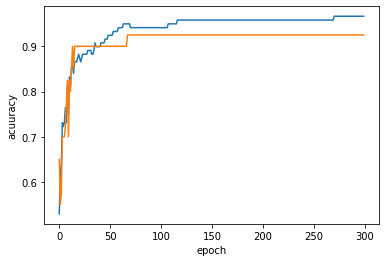

In [14]:
# 300번 할 동안의 테스트와 훈련을 그림으로 그리자
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('acuuracy')
plt.show()

In [15]:
#그래프를 통해서 알수 있는 것은 train_score와 test_score가 벌어짐이 적은 곳으로 생성 즉 약 100번째
# 따라서 이를 보고 다시 모델을 학습함
# tol = None은 무조건 적ㅇ로 반복 즉, max_iter가 100이될때까지 반복함. 
#원래 
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [16]:
# loss 함수로 inhge loss를 사용하는 경우 SVM(Support Vector Machine)에서 사용함.

sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
